# Redes Neurais Artificiais 2020.1 Projeto Prático 3.4

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. 'activation'  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [11]:
import math
import numpy as np  
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import pickle
from joblib import dump, load

from google.colab import drive
drive.mount('/content/drive')
dados = pd.read_csv('/content/drive/Shared drives/Datasets/covtype.csv', sep=',')

# dados = pd.read_csv("covtype.csv", sep=',', dtype='uint8')

X = np.array(dados.drop("Cover_Type", axis = 1))
y = np.array(dados.Cover_Type)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Redes neurais da atividade 3.3 (Top 6 melhores redes)
# parameters = [
# {
# 'id': 0,
# 'hidden_layer_sizes' : (100,),
# 'activation' : 'relu'
# },
# {
# 'id': 1,
# 'hidden_layer_sizes' : (30,),
# 'activation' : 'tanh'
# },
# {
# 'id': 2,
# 'hidden_layer_sizes' : (20, 5),
# 'activation' : 'tanh'
# },
# {
# 'id': 3,
# 'hidden_layer_sizes' : (16,),
# 'activation' : 'tanh'
# },
# {
# 'id': 4,
# 'hidden_layer_sizes' : (10,),
# 'activation' : 'tanh'
# },
# {
# 'id': 5,
# 'hidden_layer_sizes' : (25,),
# 'activation' : 'identity'
# }
# ]

parameters = [
{
'id': 5,
'hidden_layer_sizes' : (25,),
'activation' : 'identity'
},
]

In [13]:
# hyperparameters = {
#     'solver': ['adam', 'sgd'], 
#     'batch_size': [100], 
#     'learning_rate_init': [0.005, 0.001],
#     'n_iter_no_change': [10, 15],
#     'max_iter': [150,100]
# }

hyperparameters = {
    'solver': ['adam'], 
    'batch_size': [100], 
    'learning_rate_init': [0.05],
    'n_iter_no_change': [10],
    'max_iter': [150]
}

In [14]:
# classifiers = [
#   {'id': 0, 'model': [], 'f1-score': []}, {'id': 1, 'model': [], 'f1-score': []}, 
#   {'id': 2, 'model': [], 'f1-score': []}, {'id': 3, 'model': [], 'f1-score': []}, 
#   {'id': 4, 'model': [], 'f1-score': []}, {'id': 5, 'model': [], 'f1-score': []}
# ]

classifiers = [
  {'id': 0, 'model': [], 'f1-score': []},
]

In [15]:
kf = KFold(n_splits=5)

for i in range(len(parameters)):
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std  = (X_test  - np.mean(X_train))/np.std(X_train)
    
    mlp = MLPClassifier(hidden_layer_sizes = parameters[i]['hidden_layer_sizes'],
                        activation = parameters[i]['activation']
                        )

    clf = GridSearchCV(mlp, hyperparameters, verbose=10, n_jobs=3)
    clf.fit(X_train_std, y_train)

    classifiers[i]['model'].append(clf)

    y_pred = clf.predict(X_test_std)
    classifiers[i]['f1-score'].append(f1_score(y_test, y_pred, average='macro'))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  2.3min remaining:  1.5min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  2.0min remaining:  1.4min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  1.9min remaining:  1.3min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.3min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.0min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  2.6min remaining:  1.7min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.4min finished


## Identificando a mellhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [16]:
def findTheBestModel():
  listBestLocal = []
  bestGlobal = 0
  for i in range(len(classifiers)):
    listBestLocal.append(max(classifiers[i]['f1-score']))
  bestGlobal = max(listBestLocal)
  
  for i in range(len(classifiers)):
    indexBestF1_score = -1
    indexBestModel = -1
    if bestGlobal in classifiers[i]['f1-score']:
      indexBestF1_score = classifiers[i]['f1-score'].index(bestGlobal)
      indexBestModel = i
      break
  return indexBestF1_score, indexBestModel

def showAllModelInformation(indexBestF1_score, indexBestModel):
  # bestParameters = parameters[classifiers[indexBestModel]['id']]
  bestParameters = parameters[indexBestModel]
  bestHyperParameters = classifiers[indexBestModel]['model'][indexBestF1_score].best_params_

  print("Parâmetros utilizados:\n",bestParameters)
  print("\nMelhores hiperparâmetros:\n",bestHyperParameters,"\n")

  print("F1-Score deste modelo:")
  for i in range(len(classifiers[indexBestModel]['f1-score'])):
    print("{0}-Fold ->".format(i+1),classifiers[indexBestModel]['f1-score'][i])
  
  return bestParameters, bestHyperParameters

In [17]:
indexBestF1_score, indexBestModel = findTheBestModel()
bestParameters, bestHyperParameters = showAllModelInformation(indexBestF1_score, indexBestModel)

Parâmetros utilizados:
 {'id': 5, 'hidden_layer_sizes': (25,), 'activation': 'identity'}

Melhores hiperparâmetros:
 {'batch_size': 100, 'learning_rate_init': 0.05, 'max_iter': 150, 'n_iter_no_change': 10, 'solver': 'adam'} 

F1-Score deste modelo:
1-Fold -> 0.2543349670410167
2-Fold -> 0.2810938205320835
3-Fold -> 0.34999938023969124
4-Fold -> 0.32321610531028483
5-Fold -> 0.3881073963601802


## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [18]:
# 1. Consulte a documentação a seguir: https://scikit-learn.org/stable/modules/model_persistence.html  
# 2. Treine o modelo com todos os dados  
bestClf = MLPClassifier(hidden_layer_sizes = bestParameters['hidden_layer_sizes'],
                        activation = bestParameters['activation'],
                        batch_size = bestHyperParameters['batch_size'],
                        learning_rate_init = bestHyperParameters['learning_rate_init'],
                        max_iter = bestHyperParameters['max_iter'],
                        n_iter_no_change = bestHyperParameters['n_iter_no_change'],
                        solver = bestHyperParameters['solver'])

bestClf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='identity', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.05, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [19]:
# 3. Salve o modelo em disco  
dump(bestClf, 'BestModel.joblib') 

['BestModel.joblib']

In [20]:
# 4. Construa uma rotina que recupere o modelo em disco  
storedClf = load('BestModel.joblib')

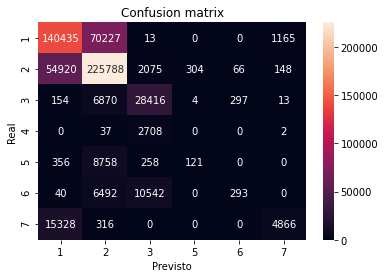

In [21]:
# 5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas
y_pred = bestClf.predict(X)

results = {'real': y, 'previsto': y_pred}
results_df = pd.DataFrame.from_dict(results)
mc = pd.crosstab(results_df['real'], 
                 results_df['previsto'], 
                 rownames=['Real'], 
                 colnames=['Previsto'])
ax = plt.axes()
sn.heatmap(mc, annot=True, fmt="d", ax = ax)
ax.set_title('Confusion matrix')
plt.show()